In [ ]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 3.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=8434b3f1153c455bda2466457c8fc301050a4dcaef84a096a971a1b18f2d2cf4
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

In [ ]:
#Se crean los objeteos entecendetes y consecuentes a partir de las viarbles
#del universo y las funciones de membresía
calidad = ctrl.Antecedent(np.arange(0,11,1), 'calidad')
servicio = ctrl.Antecedent(np.arange(0,11,1), 'servicio')
propina = ctrl.Consequent(np.arange(0,26,1), 'propina')

In [ ]:
#La población de la función membresía automática es posible con .automf (3,5 o 7)
calidad.automf(3)
servicio.automf(3)

#Las funciones de membresía personalizadas se pueden construir
#interacticamente con la API pythonic
propina['bajo'] = fuzz.trimf(propina.universe, [0,0,13])
propina['medio'] = fuzz.trimf(propina.universe, [0,13,25])
propina['alto'] = fuzz.trimf(propina.universe,[13,25,25])

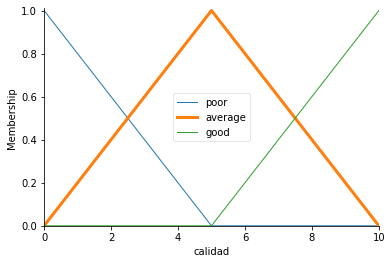

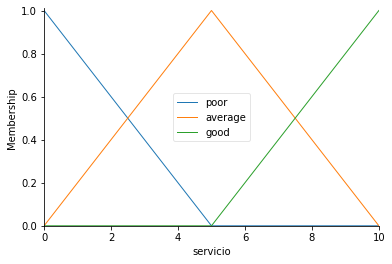

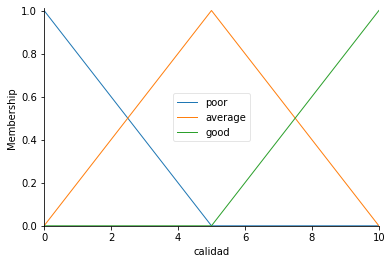

In [ ]:
#Visualización .view()
calidad['average'].view()
servicio.view()
calidad.view()

In [ ]:
#Creación de las reglas
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(calidad['average'], propina['medio'])
regla3 = ctrl.Rule(calidad['good'] | calidad['good'], propina['alto'])

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1bfd7f10f0>)

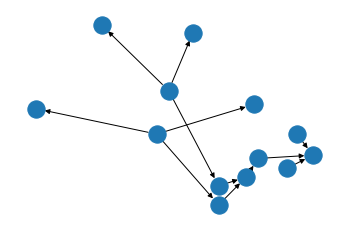

In [ ]:
regla1.view()

In [ ]:
#Generación del simulador
control_propina = ctrl.ControlSystem([regla1,regla2,regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)

#Pasar entradas al ControlSystemas usando etiquetas 'Antecedent' 
#con Pythonic API
#Nota: si quiere pasar muchas entradas a la vez, usar .inputs (dict_of_data)

asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

In [ ]:
#Se obtiene el valor
asignacion_propina.compute()

#se muestra la información
print('valor propina', asignacion_propina.output['propina'])

valor propina 13.156184486373162


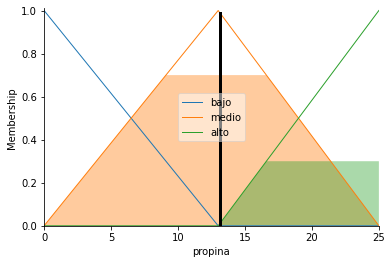

In [ ]:
propina.view(sim=asignacion_propina)